# Resources:


*   https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
*   https://jitm.ut.ac.ir/article_80028.html

*   https://towardsdatascience.com/complete-guide-to-perform-classification-of-tweets-with-spacy-e550ee92ca79?gi=7494f25db237 (not used)
*   https://github.com/kroudir/Twitter-Sentiment-Analysis-with-python/blob/master/Project_notebook.ipynb

* https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial





# ⏬ Importing & Installing Modules

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# 🗻Mounting Google Drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📖 Read Dataset & CSV files

In [3]:
path = '/content/drive/MyDrive/dm_p2_dataset/'

The faced challenge:

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 60340: invalid continuation byte

In [4]:
df_train = pd.read_csv(path + 'twitter_training.csv', encoding='ISO-8859-1')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df_train.head(20)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [6]:
df_test = pd.read_csv(path + 'twitter_test.csv', encoding='ISO-8859-1')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    object
 3   Tweet content  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [7]:
df_test.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [8]:
df_valid = pd.read_csv(path + 'twitter_validation.csv', encoding='ISO-8859-1')

df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    object
 3   Tweet content  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [9]:
df_valid.head()

,Tweet ID,entity,sentiment,Tweet content
0,5328,Hearthstone,Negative,@BlizzardCS whatâs going on with Hearthstone...
1,7618,MaddenNFL,Negative,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,johnson&johnson,Negative,Johnson & Johnson is about to enter phase 3 tr...
3,10008,PlayerUnknownsBattlegrounds(PUBG),Negative,How is banning #PUBG going to fix anything? Al...
4,49,Amazon,Neutral,I played this interesting quiz on Amazon - Try...


In [10]:
df_train.shape

(74682, 4)

In [11]:
np.sum(df_train.isnull().any(axis=1)) # For tweet_content column -> 74682 - 73996

686

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
df_train.dropna(subset=['Tweet content'], inplace=True)

In [14]:
df_train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

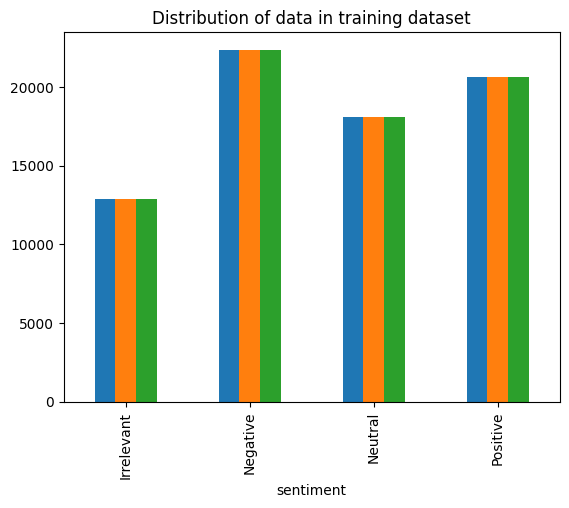

In [15]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data in training dataset',legend=False)
# Storing data in lists.
text, sentiment = list(df_train['Tweet content']), list(df_train['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

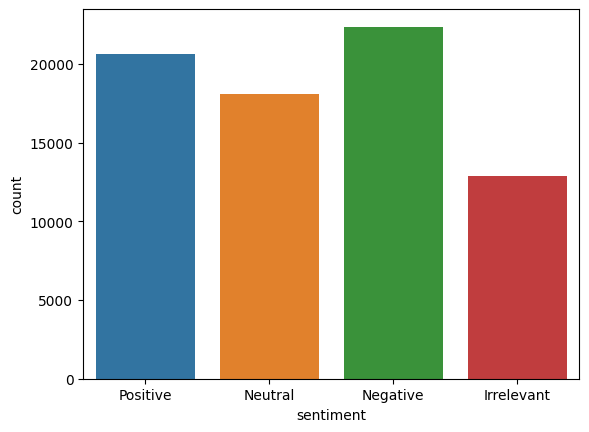

In [16]:
sns.countplot(x='sentiment', data=df_train)

# ➕ Appending validation and test set to train

In [17]:
combi = df_train.append(df_test, ignore_index=True)
combi.shape

<ipython-input-17-c8539605bf3d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = df_train.append(df_test, ignore_index=True)


(74496, 4)

In [18]:
combi = combi.append(df_valid, ignore_index=True)
combi.shape

<ipython-input-18-348625c2fd33>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = combi.append(df_valid, ignore_index=True)


(74996, 4)

In [19]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74996 entries, 0 to 74995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74996 non-null  int64 
 1   entity         74996 non-null  object
 2   sentiment      74996 non-null  object
 3   Tweet content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [20]:
combi.head(-10)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74981,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\nâO...
74982,3980,Cyberpunk2077,Positive,This looks like a poster for a 90s action movi...
74983,4905,GrandTheftAuto(GTA),Irrelevant,The ultimate pruning machine! @stihlusa GTA 26...
74984,7516,LeagueOfLegends,Neutral,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...


In [21]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74996 entries, 0 to 74995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74996 non-null  int64 
 1   entity         74996 non-null  object
 2   sentiment      74996 non-null  object
 3   Tweet content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# 🧹 Pre-processing

```
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':-)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [': )']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
```



In [22]:
def remove_pattern(input_txt, pattern, new_text, opt="replace"):
    r = re.findall(pattern, input_txt)
    if len(r) > 0:
      print(f"The finded item to be replaced for the given pattern {pattern} is: {r}")
    if opt == "replace":
      for i in r:
        input_txt = re.sub(re.escape(i), new_text, input_txt)
    if opt == "remove":
      for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

To solve the challenge:

https://stackoverflow.com/questions/15947140/python-regex-error-unbalanced-parenthesis

## For smile emoticons → replace them with "simle"

In [23]:
combi['tidy_tweet'] = combi['Tweet content'].apply(lambda x: remove_pattern(x,
                                                                            "(:\s?\)|:-\)|\(\s?:|\(-:|:\’\))",
                                                                            new_text="smile",
                                                                            opt="replace"))
combi['tidy_tweet'].head(10)


The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':-)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [': )']
The finded item to be replaced for the

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: ['xD']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: ['XD']
```



## For laughter emoticons → replace them with "laugh"

In [24]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?D|:-D|x-?D|X-?D)",
                                                   new_text="laugh",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pa

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

Nothing was found...

## For love emoticons → replace them with "love"

In [25]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(<3|:\*)",
                                                   new_text="love",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [') :']
```



## For sadness emoticons → replace them with "sad"

In [26]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?\(|:-\(|\)\s?:|\)-:)",
                                                   new_text="sad",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [') :']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The fi

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
```



## For crying emoticons → replace them with "cry"

In [27]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   """(:,\(|:\’\(|:"\()""",
                                                   new_text="cry",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']


0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

Nothing was found...

## For wink emoticons → replace them with "wink"

In [28]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?\(|:-\(|\)\s?:|\)-:)",
                                                   new_text="wink",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

## Remove the tagged names

In [29]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "@[\w]*", '', opt="replace")
combi['tidy_tweet'].head(10)

Streaming output truncated to the last 5000 lines.
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for th

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

## Removing Punctuations, Numbers, and Special Characters

In [30]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-30-07863ca8e6ff>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [31]:
combi.head(10)


,Tweet ID,entity,sentiment,Tweet content,tidy_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,So I spent a few hours making something for fu...


## Removing Short words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [32]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In the article it is said that the hashtags are better to be removed, but in the github link the opposite is said...

## Removing hashtags

In [33]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "#(\S+)", '', opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern #(\S+) is: ['Browns']
The finded item to be replaced for the given pattern #(\S+) is: ['stream', 'twitch', 'RocketLeague', 'SeaOfThieves', 'RainbowSixSiege', 'follow']
The finded item to be replaced for the given pattern #(\S+) is: ['TCCGif', 'AssassinsCreedBlackFlag', 'AssassinsCreed', 'TheCapturedCollective']
The finded item to be replaced for the given pattern #(\S+) is: ['Warzone', 'COD', 'CallofDuty', 'Warzone']
The finded item to be replaced for the given pattern #(\S+) is: ['gtc']
The finded item to be replaced for the given pattern #(\S+) is: ['COVID']
The finded item to be replaced for the given pattern #(\S+) is: ['update', 'overwatchleague', 'nyxl', 'overwatch', 'overwatch', 'blizzard', 'games', 'lockdown']
The finded item to be replaced for the given pattern #(\S+) is: ['pubg', 'pubgmobile', 'pubgkenya']
The finded item to be replaced for the given pattern #(\S+) is: ['COVID', 'vaccine', 'Glaxosmithkline']
The finded item

0                      getting borderlands will murder
1                             coming borders will kill
2                        getting borderlands will kill
3                       coming borderlands will murder
4                      getting borderlands will murder
5                      getting into borderlands murder
6    spent hours making something know HUGE Maya fa...
7    spent couple hours doing something know that h...
8    spent hours doing something know HUGE Borderla...
9    spent hours making something know HUGE Rhandle...
Name: tidy_tweet, dtype: object

## Removing URLs

Nothing was found...

In [34]:
combi['tidy_tweet'].head(10)

0                      getting borderlands will murder
1                             coming borders will kill
2                        getting borderlands will kill
3                       coming borderlands will murder
4                      getting borderlands will murder
5                      getting into borderlands murder
6    spent hours making something know HUGE Maya fa...
7    spent couple hours doing something know that h...
8    spent hours doing something know HUGE Borderla...
9    spent hours making something know HUGE Rhandle...
Name: tidy_tweet, dtype: object

In [35]:
def Find(input_txt):
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  urls = re.findall(regex, input_txt)
  list_of_strings = [''.join(i) for i in urls]
  print(f"The urls are: {list_of_strings}")
  for i in list_of_strings:
    input_txt = re.sub(re.escape(i), '', input_txt)
  return input_txt

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: Find(x))
combi['tidy_tweet'].head(10)

Streaming output truncated to the last 5000 lines.
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: 

0                      getting borderlands will murder
1                             coming borders will kill
2                        getting borderlands will kill
3                       coming borderlands will murder
4                      getting borderlands will murder
5                      getting into borderlands murder
6    spent hours making something know HUGE Maya fa...
7    spent couple hours doing something know that h...
8    spent hours doing something know HUGE Borderla...
9    spent hours making something know HUGE Rhandle...
Name: tidy_tweet, dtype: object

In [36]:
combi['tidy_tweet'].head(10)

0                      getting borderlands will murder
1                             coming borders will kill
2                        getting borderlands will kill
3                       coming borderlands will murder
4                      getting borderlands will murder
5                      getting into borderlands murder
6    spent hours making something know HUGE Maya fa...
7    spent couple hours doing something know that h...
8    spent hours doing something know HUGE Borderla...
9    spent hours making something know HUGE Rhandle...
Name: tidy_tweet, dtype: object

# 🎯Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [37]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [getting, borderlands, will, murder]
1           [coming, borders, will, kill]
2      [getting, borderlands, will, kill]
3     [coming, borderlands, will, murder]
4    [getting, borderlands, will, murder]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets

In [38]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
# stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [39]:
tokenized_tweet.head()

0     [get, borderland, will, murder]
1          [come, border, will, kill]
2       [get, borderland, will, kill]
3    [come, borderland, will, murder]
4     [get, borderland, will, murder]
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.



In [40]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [41]:
combi.head()

,Tweet ID,entity,sentiment,Tweet content,tidy_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,get borderland will murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border will kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,get borderland will kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,come borderland will murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,get borderland will murder


# ⛅Story Generation and Visualization from Tweets

In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights.

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:


*   What are the most common words in the entire dataset?
*   What are the most common words in the dataset for negative and positive tweets, respectively?
*   How many hashtags are there in a tweet?
*   Which trends are associated with my dataset?
*   Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

## Understanding the common words used in the tweets: WordCloud

In [50]:
from wordcloud import WordCloud

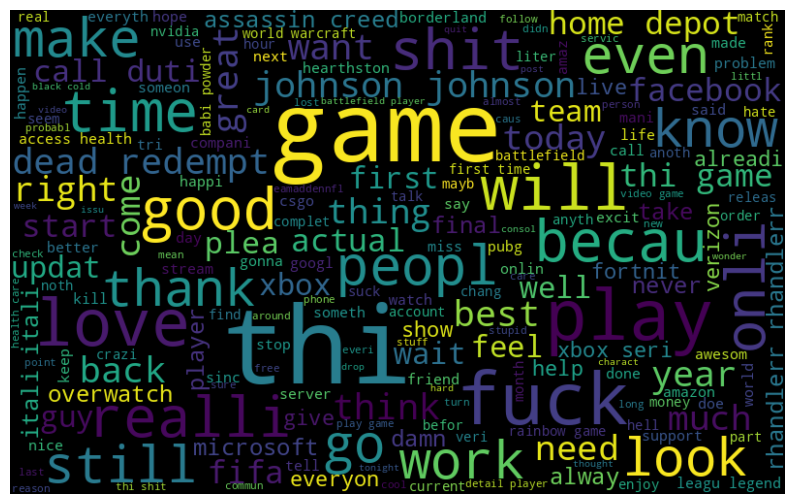

In [51]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Positive, Neutral, Negative, Irrelevant

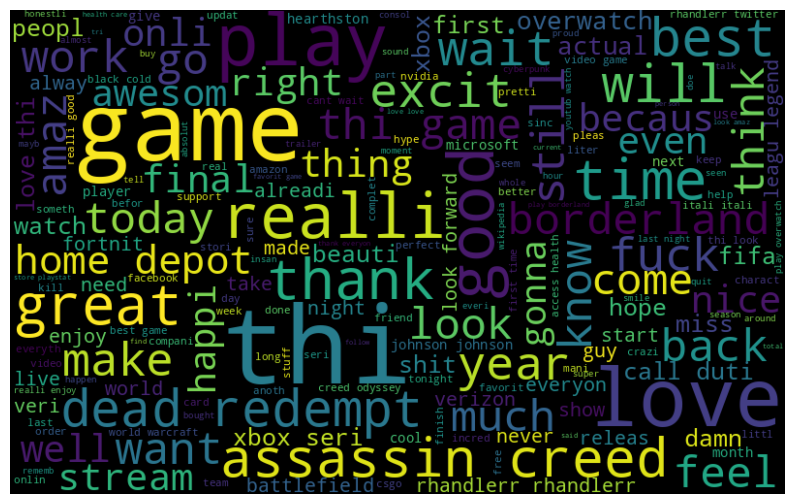

In [52]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Positive']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

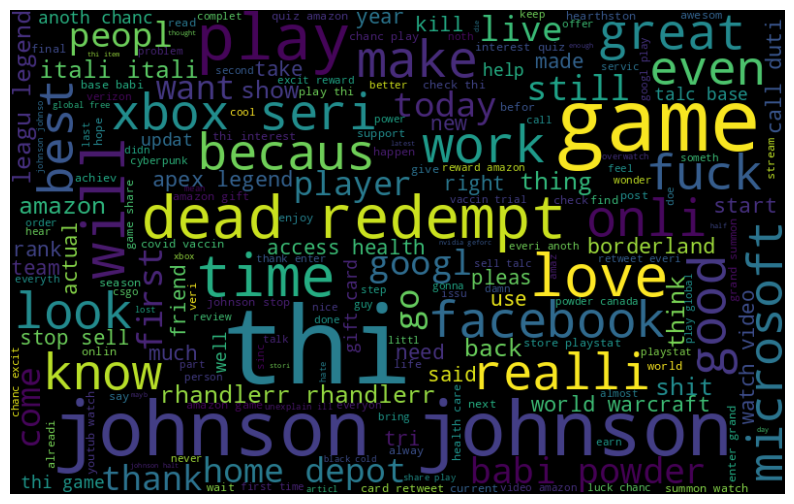

In [53]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Neutral']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

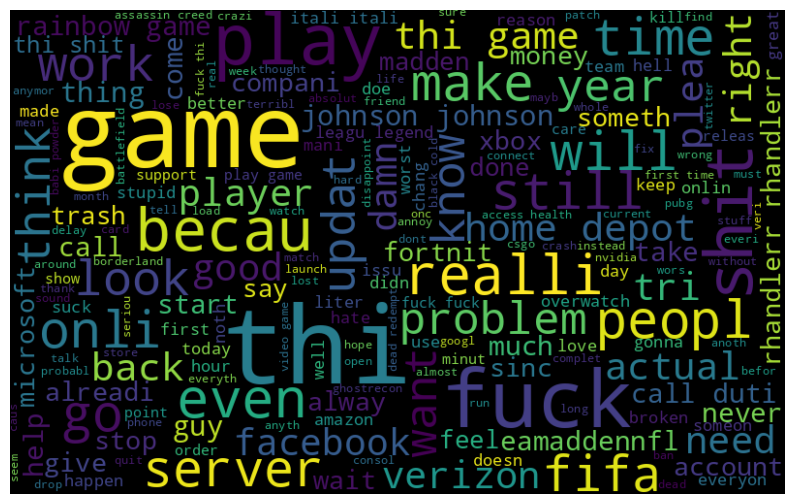

In [54]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

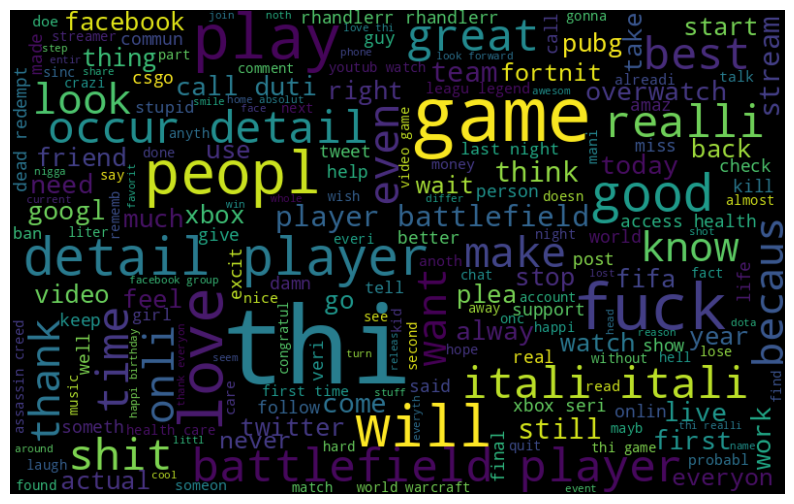

In [55]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Irrelevant']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 💱 Feature Extraction

## Bag-of-Words Features

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [43]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(74996, 1000)

## TF-IDF Features

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(74996, 1000)

## Word2Vec Features

### 1) Word2Vec Embedding

In [45]:
import multiprocessing

In [46]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [47]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=10,
            alpha=0.03,
            sample=6e-5,
            min_alpha=0.0007,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= cores - 1, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6546512, 15914700)

In [48]:
model_w2v.wv.most_similar(positive="dinner")

[('chicken', 0.6264021992683411),
 ('beverli', 0.539074182510376),
 ('illustr', 0.4783690571784973),
 ('stranger', 0.4716733694076538),
 ('plate', 0.464679092168808),
 ('vista', 0.4487731158733368),
 ('jake', 0.41490408778190613),
 ('plea', 0.40952593088150024),
 ('dragonblogg', 0.4033353328704834),
 ('tazzwolff', 0.4019101858139038)]

In [63]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5555362105369568),
 ('potu', 0.45873814821243286),
 ('tencent', 0.4518853724002838),
 ('sumof', 0.43801555037498474),
 ('exec', 0.43675467371940613),
 ('hypocrit', 0.4198746085166931),
 ('madam', 0.4107217490673065),
 ('pentagon', 0.4031151235103607),
 ('democraci', 0.3987695574760437),
 ('grave', 0.3986782431602478)]

In [64]:
model_w2v.wv.most_similar(positive="fuck")

[('shit', 0.6293401122093201),
 ('like', 0.571853518486023),
 ('damn', 0.5688913464546204),
 ('thi', 0.5632284879684448),
 ('gooo', 0.5178514719009399),
 ('that', 0.5128984451293945),
 ('momma', 0.4987010359764099),
 ('just', 0.49164241552352905),
 ('realli', 0.47884026169776917),
 ('actual', 0.4774125814437866)]

In [65]:
model_w2v.wv['food']


array([ 0.21914536, -0.5286997 , -0.27365953,  0.28831923, -0.10142737,
       -0.7795229 , -0.44505215,  0.18801062,  0.5789797 ,  0.08120496,
        0.24236672, -0.22590877, -0.43467566, -1.0706213 , -0.6098146 ,
        0.9298322 ,  0.25546035,  0.57199556,  0.3623992 , -0.13205253,
        0.842748  , -0.0627521 , -0.14260194,  0.29023838, -0.33125737,
       -0.18387991,  0.275443  , -0.55176216, -1.0151385 , -0.10510109,
       -0.03758543, -0.30754176, -0.1033312 , -0.0545124 , -0.5487121 ,
        0.3948248 ,  0.64992195,  0.22509956, -0.38688537,  0.31206113,
        0.20565335,  0.30393258, -0.10180155, -0.7106042 ,  0.5413113 ,
        0.17886864, -0.12045474, -0.12640251, -0.17473723,  0.4863221 ,
        0.63411486,  0.18314978, -0.248153  , -0.93596405,  0.34759465,
       -0.6032992 , -0.28121674, -0.29163063, -0.09919732,  0.65219235,
        0.52056414, -0.3087295 ,  0.47198308, -0.21172783, -0.3646033 ,
        0.6063116 ,  0.12937601,  0.5879276 ,  0.3540132 , -0.20

#### Preparing Vectors for Tweets


Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [49]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [50]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

wordvec_df.shape

(74996, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.



### 2) Doc2Vec Embedding

In [51]:
#Let’s load the required libraries.
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument


In [52]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [53]:
#Let’s have a look at the result.
labeled_tweets[:6]

[TaggedDocument(words=['get', 'borderland', 'will', 'murder'], tags=['tweet_0']),
 TaggedDocument(words=['come', 'border', 'will', 'kill'], tags=['tweet_1']),
 TaggedDocument(words=['get', 'borderland', 'will', 'kill'], tags=['tweet_2']),
 TaggedDocument(words=['come', 'borderland', 'will', 'murder'], tags=['tweet_3']),
 TaggedDocument(words=['get', 'borderland', 'will', 'murder'], tags=['tweet_4']),
 TaggedDocument(words=['get', 'into', 'borderland', 'murder'], tags=['tweet_5'])]

In [54]:
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(
    dm=1, # dm = 1 for ‘distributed memory’ model
    dm_mean=1, # dm = 1 for using mean of the context word vectors
    vector_size=200, # no. of desired features
    window=5, # width of the context window
    negative=7, # if > 0 then negative sampling will be used
    min_count=5, # Ignores all words with total frequency lower than 2.
    workers=3, # no. of cores
    alpha=0.1, # learning rate
    seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|██████████| 74996/74996 [00:00<00:00, 3109828.30it/s]


In [55]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.dv[i].reshape((1,200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(74996, 200)

In [56]:
import time

# 📳 Modeling

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

### Bag-of-Words Features

In [76]:
df_train.shape, df_test.shape

((73996, 4), (500, 4))

In [77]:
bow.shape

(74996, 1000)

In [78]:
df_train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [58]:
# Mapping dictionary
mapping = {'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Irrelevant': 4}

# Convert values to numbers
df_train['sentiment'] = df_train['sentiment'].map(mapping)

In [80]:
df_train['sentiment'].unique()

array([1, 2, 3, 4])

In [81]:
df_train.head(20)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,1,im getting into borderlands and i can murder y...
6,2402,Borderlands,1,So I spent a few hours making something for fu...
7,2402,Borderlands,1,So I spent a couple of hours doing something f...
8,2402,Borderlands,1,So I spent a few hours doing something for fun...
9,2402,Borderlands,1,So I spent a few hours making something for fu...


In [82]:
df_train['sentiment']

0        1
1        1
2        1
3        1
4        1
        ..
74677    1
74678    1
74679    1
74680    1
74681    1
Name: sentiment, Length: 73996, dtype: int64

In [59]:
# Extracting train and test BoW features
train_bow = bow[:73996,:]
test_bow = bow[73996:73996+500, :]
valid_bow = bow[74496:,:]

In [83]:
lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(train_bow, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(valid_bow)
print(f"The Predictions using Logistic Regression Model + Bag-Of-Words is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + Bag-Of-Words is: [3 3 3 3 2 1 3 4 1 1 2 2 1 3 3 4 3 3 3 2 2 2 4 2 3 2 1 1 3 3 3 1 4 4 3 2 3
 2 2 3 2 2 1 3 3 1 1 1 3 3 2 4 3 2 4 3 2 3 3 2 1 3 1 3 1 3 3 2 4 3 3 1 3 4
 3 2 3 2 2 1 3 1 1 1 3 1 4 2 2 3 2 2 2 4 3 1 1 2 4 2 2 1 3 2 1 3 2 2 2 2 3
 2 2 1 2 3 4 1 2 3 2 2 1 3 4 3 1 3 3 3 3 3 3 3 2 3 4 1 1 3 1 2 3 3 4 2 2 1
 1 1 1 3 4 3 3 2 2 1 2 4 1 3 4 4 4 1 2 1 3 1 1 3 3 1 3 4 2 1 2 1 2 1 1 2 3
 3 4 3 2 3 4 3 3 1 2 3 1 3 3 2 1 1 1 3 1 1 3 2 1 2 1 3 3 3 2 1 2 3 3 1 1 1
 4 4 1 4 3 2 3 2 1 1 2 3 2 1 1 1 1 3 3 3 3 3 3 3 4 1 1 1 2 1 1 1 3 3 3 2 3
 3 1 2 1 2 1 3 2 1 4 1 2 1 3 3 3 2 2 4 3 1 3 3 1 1 1 2 2 3 1 3 3 4 3 1 2 3
 3 2 3 1 3 1 3 2 3 1 2 3 1 3 3 3 3 1 3 3 4 1 2 3 3 1 4 3 1 3 4 3 3 2 3 2 3
 1 1 1 3 2 1 3 4 4 3 3 3 3 3 3 4 3 3 3 2 2 1 4 2 2 4 1 3 2 1 2 2 3 1 1 3 1
 2 2 3 2 1 2 4 4 1 1 1 1 1 3 3 3 2 3 1 2 1 4 2 3 4 3 3 1 3 2 3 2 1 3 1 3 3
 4 1 3 4 1 2 

In [60]:
# Mapping dictionary
mapping = {'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Irrelevant': 4}

# Convert values to numbers
df_test['sentiment'] = df_test['sentiment'].map(mapping)

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    int64 
 3   Tweet content  500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [86]:
test_bow.shape


(500, 1000)

In [61]:
from sklearn.metrics import confusion_matrix

In [89]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression + Bag of Words:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression + Bag of Words:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression + Bag of Words:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression + Bag of Words:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression + Bag of Words:")
print(cm)

Accuracy For Logistic Regression + Bag of Words: 0.648
F1 Score For Logistic Regression + Bag of Words: 0.6331729704305337
Precision For Logistic Regression + Bag of Words: 0.6497411595839556
Recall For Logistic Regression + Bag of Words: 0.6327652627133484
Confusion Matrix For Logistic Regression + Bag of Words:
[[111  12  18   7]
 [ 21  75  23  15]
 [ 16   9  95   6]
 [ 22   6  21  43]]


In [62]:
# Convert values to numbers
df_valid['sentiment'] = df_valid['sentiment'].map(mapping)

In [91]:
df_valid.head()

,Tweet ID,entity,sentiment,Tweet content
0,5328,Hearthstone,3,@BlizzardCS whatâs going on with Hearthstone...
1,7618,MaddenNFL,3,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,johnson&johnson,3,Johnson & Johnson is about to enter phase 3 tr...
3,10008,PlayerUnknownsBattlegrounds(PUBG),3,How is banning #PUBG going to fix anything? Al...
4,49,Amazon,2,I played this interesting quiz on Amazon - Try...


In [92]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_bow_v2.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [63]:
tfidf_train = tfidf[:73996,:]
tfidf_test = tfidf[73996:73996+500, :]
tfidf_valid = tfidf[74496:,:]

In [94]:
lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(tfidf_train, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(tfidf_valid)
print(f"The Predictions using Logistic Regression Model + TF-IDF is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + TF-IDF is: [3 3 3 3 2 1 3 4 1 1 3 2 1 3 3 4 3 3 3 2 2 2 3 2 3 2 1 1 3 3 3 1 4 1 3 2 3
 2 2 3 2 2 1 3 3 1 1 1 3 3 2 4 3 2 4 3 2 3 3 2 1 3 1 3 1 3 2 2 4 3 3 1 3 4
 3 2 3 2 2 3 1 1 1 1 3 1 4 2 2 3 2 2 2 4 3 1 1 2 4 3 2 1 3 2 1 3 2 2 2 2 3
 2 2 1 2 3 4 4 2 3 2 2 1 3 4 3 1 3 3 3 3 3 1 3 2 2 4 1 1 3 1 2 3 3 4 2 2 1
 1 1 1 3 4 3 3 2 2 1 2 4 1 3 4 3 4 1 2 1 3 1 1 3 3 1 3 4 2 1 2 1 2 1 1 2 3
 3 4 3 2 3 4 3 3 1 2 3 1 3 3 2 1 1 1 3 1 1 3 2 1 2 1 3 3 3 2 1 2 3 3 1 1 1
 4 4 1 3 3 2 3 2 1 1 2 3 2 1 1 1 1 3 2 3 3 3 3 3 4 1 1 1 2 2 1 2 3 3 3 2 3
 3 1 2 1 2 1 3 2 1 4 1 2 1 3 3 3 2 2 4 3 1 3 3 2 1 3 2 2 3 1 4 3 4 3 1 1 3
 3 2 3 1 3 2 2 2 3 1 2 3 1 4 3 3 3 1 3 3 1 1 2 3 3 1 2 3 1 3 4 3 3 2 3 2 3
 1 3 1 3 3 1 3 4 3 3 3 3 3 3 3 4 3 3 3 2 2 1 4 2 2 4 1 3 2 1 2 2 3 1 2 3 1
 2 2 3 2 3 2 4 4 4 1 1 4 1 4 3 3 2 2 2 2 1 4 2 3 4 3 3 1 3 2 3 2 1 3 1 3 3
 4 1 3 4 1 2 2 4 4 

In [95]:
# Extract the features from the test dataset
test_features = tfidf_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression + TF-IDF:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression + TF-IDF:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression + TF-IDF:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression + TF-IDF:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression + TF-IDF:")
print(cm)

Accuracy For Logistic Regression + TF-IDF: 0.658
F1 Score For Logistic Regression + TF-IDF: 0.6449173511810471
Precision For Logistic Regression + TF-IDF: 0.6603112650026886
Recall For Logistic Regression + TF-IDF: 0.6449768114271683
Confusion Matrix For Logistic Regression + TF-IDF:
[[107  10  22   9]
 [ 15  78  26  15]
 [ 13   9  99   5]
 [ 20   7  20  45]]


In [96]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_tfidf_v2.csv', index=False) # writing data to a CSV file

### Word2Vec Features

In [97]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.033555,-0.093502,0.004573,0.076986,0.118522,0.011416,-0.118236,-0.464601,0.597547,-0.132674,...,0.317068,0.129330,0.054113,-0.124400,0.094824,0.228099,-0.496073,-0.071258,-0.165579,-0.286518
1,0.094343,-0.246501,-0.064361,0.011921,-0.023388,-0.153286,-0.198323,-0.121314,0.453983,-0.224031,...,0.059565,0.129642,-0.034797,-0.343715,0.055436,0.171019,-0.194012,-0.059580,-0.302110,-0.080278
2,-0.013999,-0.164443,-0.135863,0.184534,-0.015646,-0.188999,-0.096140,-0.316273,0.434079,-0.255567,...,0.114613,0.083808,0.093349,-0.186055,0.080070,0.072132,-0.276699,0.048131,-0.295499,-0.202077
3,0.054543,-0.054826,-0.064532,0.066101,0.102258,0.006869,-0.159117,-0.437986,0.606209,-0.048746,...,0.310485,0.234989,0.033845,-0.143876,0.091493,0.188435,-0.484295,-0.161254,-0.236016,-0.182738
4,0.033555,-0.093502,0.004573,0.076986,0.118522,0.011416,-0.118236,-0.464601,0.597547,-0.132674,...,0.317068,0.129330,0.054113,-0.124400,0.094824,0.228099,-0.496073,-0.071258,-0.165579,-0.286518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74991,0.187882,-0.176793,0.066319,0.041317,0.252071,-0.128459,-0.267262,-0.091097,0.178190,-0.276490,...,-0.032387,0.253906,-0.049987,-0.104803,0.075816,-0.049623,-0.288510,0.118381,-0.003464,0.158540
74992,0.144425,-0.259361,-0.027196,0.098834,-0.062196,-0.246577,-0.119270,-0.210925,0.289454,-0.015389,...,-0.076145,0.243334,-0.080208,-0.137919,0.000565,0.061605,-0.154447,0.135432,0.002020,-0.123417
74993,0.167162,-0.189070,-0.148252,0.060036,-0.071785,-0.209972,-0.405385,-0.153181,0.458814,-0.089038,...,0.263488,0.184249,0.012114,-0.135705,0.055913,0.114347,-0.291182,-0.191430,-0.093898,-0.175374
74994,0.014984,-0.121387,-0.156934,-0.022641,-0.097464,-0.236180,-0.384498,-0.217457,0.285629,-0.002827,...,0.105473,0.214080,0.013798,-0.083392,0.100184,-0.029108,-0.390959,0.343735,0.044208,0.101241


In [64]:
wordvec_df_train = wordvec_df.iloc[:73996,:]
wordvec_df_test = wordvec_df.iloc[73996:73996+500, :]
wordvec_df_valid = wordvec_df.iloc[74496:,:]

In [98]:
lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(wordvec_df_train, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(wordvec_df_valid)
print(f"The Predictions using Logistic Regression Model + Word2Vec is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + Word2Vec is: [3 3 2 3 2 1 3 4 1 4 1 2 1 3 1 2 4 3 3 2 2 2 2 2 3 2 1 1 3 3 3 4 1 4 2 1 3
 2 1 3 2 2 1 3 2 1 1 2 3 1 2 4 3 3 3 3 2 3 3 2 1 3 4 3 1 3 2 2 4 3 3 1 3 4
 3 1 3 2 2 3 2 1 3 3 2 1 4 1 2 3 1 2 2 1 3 1 2 2 2 3 2 1 2 2 4 4 1 2 2 2 3
 2 3 2 1 3 1 4 1 3 2 2 4 3 4 3 1 3 3 3 3 3 4 2 2 2 2 1 1 4 1 2 3 3 4 2 2 1
 1 1 4 2 3 3 2 3 2 1 3 4 1 3 3 3 2 1 2 1 3 1 2 3 2 1 3 2 1 2 2 2 2 4 4 2 3
 4 3 3 2 3 4 3 3 3 3 3 1 1 3 2 2 3 3 1 1 2 3 2 2 2 2 3 3 3 3 1 2 3 3 2 1 1
 4 4 1 4 3 3 3 2 4 1 2 2 2 1 1 1 1 3 3 3 3 3 3 1 2 1 1 1 1 2 1 2 3 2 3 3 3
 1 1 2 1 2 1 3 2 1 3 1 2 2 3 3 3 1 2 4 3 1 3 3 1 1 3 2 2 3 1 2 2 3 3 1 3 3
 3 2 3 2 3 2 2 2 3 1 2 3 1 4 1 3 1 1 2 3 1 1 2 3 2 4 2 1 1 3 1 3 3 3 3 2 3
 1 2 1 2 2 1 3 3 3 4 3 3 3 3 3 3 2 2 1 1 2 1 3 2 2 1 1 3 2 1 3 2 3 2 2 4 1
 2 2 2 3 3 2 1 4 1 1 4 1 2 4 3 3 2 3 2 1 3 2 2 3 4 3 4 1 3 2 3 4 2 3 1 3 3
 1 1 3 2 1 2 4 2 

In [99]:
# Extract the features from the test dataset
test_features = wordvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression +  Word2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression +  Word2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression +  Word2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression +  Word2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression +  Word2Vec:")
print(cm)

Accuracy For Logistic Regression +  Word2Vec: 0.558
F1 Score For Logistic Regression +  Word2Vec: 0.5412574790089445
Precision For Logistic Regression +  Word2Vec: 0.5534236271460286
Recall For Logistic Regression +  Word2Vec: 0.5401906727344754
Confusion Matrix For Logistic Regression +  Word2Vec:
[[94 27 16 11]
 [17 77 28 12]
 [20 25 76  5]
 [25 16 19 32]]


In [100]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_wordvec_v2.csv', index=False) # writing data to a CSV file

### Doc2Vec Features

In [65]:
docvec_df_train = docvec_df.iloc[:73996,:]
docvec_df_test = docvec_df.iloc[73996:73996+500, :]
docvec_df_valid = docvec_df.iloc[74496:,:]

In [101]:
lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(docvec_df_train, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(docvec_df_valid)
print(f"The Predictions using Logistic Regression Model + Word2Vec is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + Word2Vec is: [3 3 2 3 2 3 2 1 2 1 3 2 1 3 3 3 2 3 3 2 2 3 2 2 2 1 1 1 3 3 1 1 1 3 1 3 3
 1 1 3 2 2 1 3 2 1 1 1 2 1 4 4 3 2 3 3 2 1 3 4 1 3 2 3 1 4 3 2 3 3 3 2 3 4
 3 3 3 2 2 1 2 1 3 3 1 2 3 3 2 3 1 4 2 3 1 1 2 3 3 3 3 1 1 2 1 2 1 1 1 2 3
 3 2 1 2 3 1 3 1 3 3 2 1 3 3 3 2 3 2 3 3 3 3 2 2 4 2 2 4 3 3 2 3 1 1 3 2 3
 2 1 1 3 3 3 2 3 3 1 4 3 1 3 3 3 4 1 2 1 3 4 1 1 3 3 3 4 2 2 2 3 2 2 1 2 3
 3 3 1 3 4 4 3 2 1 3 1 1 3 3 2 1 1 1 1 3 2 3 2 1 2 2 3 2 3 2 1 2 3 2 2 1 1
 2 3 3 3 1 3 3 3 1 3 3 3 3 1 1 1 2 3 2 3 3 2 3 1 3 1 1 3 2 1 3 2 3 3 2 3 3
 1 1 2 1 2 1 3 3 1 4 2 2 1 1 3 2 1 1 4 1 3 2 1 1 1 3 2 2 3 1 3 2 3 3 1 3 3
 2 1 3 3 3 1 2 1 3 1 1 3 2 3 1 3 1 1 2 3 1 3 2 4 4 1 3 3 1 3 1 3 2 3 3 2 3
 1 3 1 1 3 3 3 1 3 3 3 3 3 3 2 4 1 3 1 1 2 1 3 3 1 3 3 3 2 1 1 2 3 3 1 3 3
 1 2 3 3 3 2 1 3 1 2 3 2 1 3 1 3 3 3 3 2 2 2 2 3 2 1 3 1 3 3 3 3 1 3 2 1 3
 1 3 2 1 1 2 2 4 

In [102]:
# Extract the features from the test dataset
test_features = docvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression +  Doc2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression +  Doc2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression +  Doc2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression +  Doc2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression +  Doc2Vec:")
print(cm)

Accuracy For Logistic Regression +  Doc2Vec: 0.444
F1 Score For Logistic Regression +  Doc2Vec: 0.40325454899479
Precision For Logistic Regression +  Doc2Vec: 0.43166259857875944
Recall For Logistic Regression +  Doc2Vec: 0.4187269683700573
Confusion Matrix For Logistic Regression +  Doc2Vec:
[[79 34 32  3]
 [37 55 37  5]
 [20 19 77 10]
 [28 15 38 11]]


In [103]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_docvec_v2.csv', index=False) # writing data to a CSV file

## Naive Bayes Multinomial Classifier

### Bag-of-Words Features

In [105]:
from sklearn.naive_bayes import MultinomialNB

In [106]:
# Extracting train and test BoW features
train_bow = bow[:73996,:]
test_bow = bow[73996:73996+500, :]
valid_bow = bow[74496:,:]
model1_nb = MultinomialNB()
model1_nb.fit(train_bow, df_train['sentiment'])

predictions = model1_nb.predict(valid_bow)
print(f"The Predictions using Naive Bayes Model + Bag-Of-Words is: {predictions}")

The Predictions using Naive Bayes Model + Bag-Of-Words is: [3 3 2 3 2 1 3 4 1 1 3 2 1 3 3 4 3 3 2 2 2 2 3 2 3 2 1 1 2 3 3 1 3 4 3 1 3
 2 1 4 2 2 1 3 3 1 1 1 3 1 2 4 3 2 3 3 2 3 3 2 1 3 4 3 1 3 3 2 4 3 3 1 3 4
 3 1 3 2 2 1 1 1 1 1 3 1 3 3 2 3 4 2 2 4 3 1 1 4 4 3 2 1 3 2 1 1 1 4 2 2 3
 2 2 1 1 3 4 1 4 3 2 2 4 3 4 3 1 3 3 3 3 3 1 3 2 3 4 1 1 3 1 2 3 3 4 2 2 1
 1 1 1 3 4 3 3 3 2 1 3 4 1 3 1 4 4 1 2 1 3 1 1 1 2 1 3 4 1 2 2 1 2 1 1 2 3
 3 4 3 2 3 4 3 3 3 1 3 1 3 3 2 2 1 1 3 1 1 3 2 1 2 2 3 3 3 2 1 2 3 3 1 1 1
 4 1 1 3 3 3 3 2 1 1 2 1 2 1 1 1 1 3 2 3 3 3 3 3 4 1 1 1 1 2 1 2 3 3 3 2 3
 3 1 2 1 2 1 1 2 1 4 1 2 1 3 3 3 1 1 4 1 1 3 2 1 1 3 2 2 3 1 3 3 4 3 1 2 3
 3 2 3 1 3 1 2 2 3 1 2 3 1 3 3 3 3 1 2 3 4 1 2 3 3 1 2 3 1 3 1 3 3 4 3 2 3
 1 1 1 3 3 1 3 4 4 3 3 3 1 3 4 4 3 3 3 1 2 4 4 2 2 4 1 3 2 1 3 2 3 1 2 3 1
 2 1 3 4 3 2 4 4 1 1 1 3 2 3 3 3 2 3 2 2 1 1 2 3 1 3 3 1 3 2 3 2 1 2 1 3 3
 4 1 3 1 1 2 2 4 4 3 3 1 4 2 3 2 3 2 1 3 2 2 1 3 3 4 2 2 3 3 4 3 4 1 3 4 2
 3 2 3 2 3 2 2 3 1 2 1 1 3 3 1 4 2 2 4 3 

In [107]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = model1_nb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Naive Bayes +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Naive Bayes +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Naive Bayes +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Naive Bayes +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Naive Bayes +  BoW:")
print(cm)

Accuracy For Naive Bayes +  BoW: 0.618
F1 Score For Naive Bayes +  BoW: 0.6008968453223069
Precision For Naive Bayes +  BoW: 0.6072681704260652
Recall For Naive Bayes +  BoW: 0.6034273125447688
Confusion Matrix For Naive Bayes +  BoW:
[[107  12  18  11]
 [ 17  69  24  24]
 [ 15  14  92   5]
 [ 23  10  18  41]]


In [108]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_nb_bow_v2.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [109]:
# Extracting train and test BoW features
train_tfidf = tfidf[:73996,:]
test_tfidf = tfidf[73996:73996+500, :]
valid_tfidf = tfidf[74496:,:]
model1_nb = MultinomialNB()
model1_nb.fit(train_tfidf, df_train['sentiment'])

predictions = model1_nb.predict(valid_tfidf)
print(f"The Predictions using Naive Bayes Model + TF-IDF is: {predictions}")

The Predictions using Naive Bayes Model + TF-IDF is: [3 3 2 3 2 1 3 4 1 1 3 2 1 3 3 4 3 3 3 2 2 2 3 2 3 2 1 1 3 3 3 1 3 1 3 1 3
 2 1 3 2 2 1 3 3 1 1 1 3 1 2 4 3 2 3 3 2 3 3 2 1 3 1 3 1 3 2 2 4 3 3 1 3 4
 3 1 3 2 2 3 1 1 1 1 3 1 3 1 2 3 3 2 2 1 3 1 1 1 4 3 2 1 3 2 1 3 1 4 3 2 3
 2 2 1 2 3 1 1 1 3 2 2 1 3 4 3 1 3 3 3 3 3 1 3 2 3 3 1 1 3 1 2 3 3 1 2 2 1
 1 1 1 3 3 3 3 3 2 1 3 4 1 3 1 3 2 1 2 1 3 1 1 1 2 1 3 2 1 2 2 1 2 1 1 2 3
 3 3 3 2 3 4 3 3 1 1 3 1 3 3 2 2 1 3 3 1 1 3 2 1 2 1 3 3 3 2 1 2 3 3 1 1 1
 4 1 1 3 3 3 3 2 1 1 2 1 2 1 1 1 1 3 2 3 3 3 3 3 3 1 1 1 2 2 1 2 3 3 3 3 3
 3 1 2 1 2 1 1 2 1 3 1 2 1 3 3 3 1 1 4 1 1 3 3 1 1 3 3 2 3 1 3 3 3 3 1 3 3
 3 2 3 1 3 1 2 2 3 1 2 3 1 3 3 3 3 1 2 3 1 1 2 3 3 1 2 3 1 3 1 3 3 3 3 2 3
 1 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 4 2 2 1 1 3 2 1 3 2 3 1 2 3 1
 2 1 3 2 3 2 4 4 1 1 1 3 3 3 3 3 2 3 2 2 1 1 2 3 1 3 3 1 3 2 3 2 1 1 1 3 3
 4 1 3 1 1 2 2 4 4 3 3 1 3 2 3 2 3 2 1 3 2 2 1 3 3 1 2 2 3 3 4 1 3 1 3 3 2
 3 2 3 2 3 2 2 3 1 2 1 1 3 3 1 1 2 2 4 3 2 1 1 

In [110]:
# Extract the features from the test dataset
test_features = test_tfidf  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = model1_nb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Naive Bayes +  TF-IDF:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Naive Bayes +  TF-IDF:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Naive Bayes +  TF-IDF:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Naive Bayes +  TF-IDF:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Naive Bayes +  TF-IDF:")
print(cm)

Accuracy For Naive Bayes +  TF-IDF: 0.616
F1 Score For Naive Bayes +  TF-IDF: 0.586698115804396
Precision For Naive Bayes +  TF-IDF: 0.6219717537232622
Recall For Naive Bayes +  TF-IDF: 0.5909324140586307
Confusion Matrix For Naive Bayes +  TF-IDF:
[[112  13  20   3]
 [ 17  71  33  13]
 [ 16  13  96   1]
 [ 27  12  24  29]]


In [111]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_nb_tfidf_v2.csv', index=False) # writing data to a CSV file

### Word2Vec Features

Challenge:

ValueError: Negative values in data passed to MultinomialNB (input X)

https://stackoverflow.com/a/34907803

In [ ]:
# Extracting train and test BoW features
train_wordvec = wordvec_df.iloc[:73996,:]
test_wordvec = wordvec_df.iloc[73996:73996+500, :]
valid_wordvec = wordvec_df.iloc[74496:,:]
model1_nb = MultinomialNB()
model1_nb.fit(train_wordvec, df_train['sentiment'])

predictions = model1_nb.predict(valid_wordvec)
print(f"The Predictions using Naive Bayes Model + Word2Vec is: {predictions}")

ValueError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(train_wordvec, df_train['sentiment'])

predictions = p.predict(valid_wordvec)
print(f"The Predictions using Naive Bayes Model + Word2Vec is: {predictions}")

The Predictions using Naive Bayes Model + Word2Vec is: [3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
# Extract the features from the test dataset
test_features = test_wordvec  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = p.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Naive Bayes + Word2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Naive Bayes + Word2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Naive Bayes + Word2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Naive Bayes + Word2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Naive Bayes + Word2Vec:")
print(cm)

Accuracy For Naive Bayes + Word2Vec: 0.272
F1 Score For Naive Bayes + Word2Vec: 0.13599560175929626
Precision For Naive Bayes + Word2Vec: 0.23644111570247933
Recall For Naive Bayes + Word2Vec: 0.2665969540969541
Confusion Matrix For Naive Bayes + Word2Vec:
[[ 11   0 137   0]
 [  1   0 133   0]
 [  1   0 125   0]
 [  3   0  89   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_nb_pipeline_wordvec.csv', index=False) # writing data to a CSV file

## SVM
too slow..Not executed...

In [67]:
from sklearn import svm

### Bag-of-Words Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(train_bow, df_train['sentiment'])
predictions = svc.predict(valid_bow)
print(f"The Predictions using SVM Model + Bag-Of-Words is: {predictions}")

In [ ]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = svc.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For SVM +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For SVM +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For SVM +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For SVM +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For SVM +  BoW:")
print(cm)

In [ ]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_svm_bow_v2.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(tfidf_train, df_train['sentiment'])
predictions = svc.predict(tfidf_valid)
print(f"The Predictions using SVM Model + Bag-Of-Words is: {predictions}")

In [ ]:
# Extract the features from the test dataset
test_features = tfidf_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = svc.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For SVM +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For SVM +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For SVM +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For SVM +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For SVM +  BoW:")
print(cm)

In [ ]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_svm_tfidf_v2.csv', index=False) # writing data to a CSV file

### Word2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(wordvec_df_train, df_train['sentiment'])
predictions = svc.predict(wordvec_df_valid)
print(f"The Predictions using SVM Model + Word2Vec is: {predictions}")

In [ ]:
# Extract the features from the test dataset
test_features = wordvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = svc.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For SVM +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For SVM +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For SVM +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For SVM +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For SVM +  BoW:")
print(cm)

In [ ]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_svm_w2v_v2.csv', index=False) # writing data to a CSV file

### Doc2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(docvec_df_train, df_train['sentiment'])
predictions = svc.predict(docvec_df_valid)
print(f"The Predictions using SVM Model + Doc2Vec is: {predictions}")

In [ ]:
# Extract the features from the test dataset
test_features = docvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = svc.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For SVM +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For SVM +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For SVM +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For SVM +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For SVM +  BoW:")
print(cm)

In [ ]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_svm_d2v_v2.csv', index=False) # writing data to a CSV file

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

### Bag-of-Words Features

In [67]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(train_bow, df_train['sentiment'])
predictions = rf.predict(valid_bow)


In [68]:
print(f"The Predictions using Random Forest + BoW is: {predictions}")

The Predictions using Random Forest + BoW is: [3 3 3 3 2 1 3 3 1 1 2 2 3 3 1 2 3 3 3 2 2 1 1 3 3 2 2 4 2 3 3 1 4 4 1 1 3
 1 1 3 2 2 1 3 2 1 1 4 3 3 2 4 2 3 1 3 2 3 3 3 1 3 2 3 1 3 3 2 3 2 3 1 3 4
 2 3 3 2 2 1 3 1 2 2 2 4 4 1 4 3 2 2 2 4 3 3 4 2 4 1 2 2 3 2 1 2 2 4 3 2 4
 2 1 2 1 1 4 1 2 3 1 2 4 4 2 3 1 2 2 3 4 2 3 4 2 4 4 1 4 3 2 3 3 2 4 2 2 1
 1 1 4 1 4 3 4 3 2 1 2 4 2 3 1 4 4 1 2 1 3 3 1 1 3 1 3 2 2 1 2 2 2 4 1 2 3
 2 2 3 1 3 4 2 1 1 1 4 1 1 3 2 1 1 4 1 3 1 3 2 1 2 2 3 3 3 2 1 2 3 4 1 1 1
 4 2 1 4 3 2 1 2 1 3 2 2 1 3 1 1 2 3 2 3 3 3 4 3 4 1 1 1 1 2 3 3 1 3 3 2 4
 1 1 2 1 2 1 3 2 1 3 2 2 1 4 3 2 4 3 4 1 1 2 1 2 1 3 2 2 2 1 4 2 4 1 1 2 3
 3 2 2 1 3 2 3 4 3 1 2 2 1 4 1 3 1 1 1 4 1 1 2 3 4 1 1 3 3 3 4 1 3 2 3 2 2
 4 1 1 3 2 1 3 3 3 3 3 3 3 4 4 4 3 3 1 2 2 1 2 2 2 4 4 3 2 1 2 3 3 1 2 4 1
 2 1 4 2 3 4 4 4 1 1 4 1 1 4 3 3 1 1 4 2 2 2 2 3 3 3 3 1 2 2 1 4 2 3 1 1 3
 1 2 2 4 1 3 4 4 4 3 2 1 4 4 1 2 3 1 3 3 2 3 2 4 3 1 4 2 3 3 2 1 4 4 2 4 2
 3 2 2 2 2 2 2 4 1 2 1 4 3 3 2 1 2 4 4 1 2 1 3 4 1 2 3

In [69]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Random Forest +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Random Forest +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Random Forest +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Random Forest +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Random Forest +  BoW:")
print(cm)

Accuracy For Random Forest +  BoW: 0.89
F1 Score For Random Forest +  BoW: 0.8877782751925166
Precision For Random Forest +  BoW: 0.8919998947700726
Recall For Random Forest +  BoW: 0.8848098353289787
Confusion Matrix For Random Forest +  BoW:
[[134   3   5   6]
 [  6 121   5   2]
 [  8   3 114   1]
 [  8   2   6  76]]


In [70]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_rf_bow_v2.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [71]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(tfidf_train, df_train['sentiment'])
predictions = rf.predict(tfidf_valid)
print(f"The Predictions using Random Forest + TF-IDF is: {predictions}")

The Predictions using Random Forest + TF-IDF is: [3 3 3 3 2 1 3 3 1 1 2 2 3 3 1 2 3 3 3 2 2 1 3 3 3 2 2 4 2 3 3 1 4 4 1 1 3
 1 1 3 2 2 1 3 2 1 1 4 3 3 2 4 2 3 1 3 2 3 3 3 1 3 2 3 1 3 3 2 3 2 3 1 3 4
 2 3 3 2 2 1 3 1 2 2 2 4 4 1 4 3 2 2 2 4 3 3 4 2 4 1 2 2 3 2 1 2 2 4 2 2 4
 2 1 2 1 1 4 1 2 3 1 2 4 4 2 3 1 2 2 3 4 2 3 4 2 4 4 1 4 3 1 3 3 2 4 2 2 3
 1 1 4 1 4 3 4 3 2 1 2 4 2 3 1 4 4 1 2 1 3 3 1 1 3 1 3 2 2 1 2 2 2 4 1 2 3
 2 2 3 1 3 4 2 1 1 1 4 1 1 3 2 1 1 4 1 3 1 3 2 1 2 2 3 3 3 2 1 2 3 4 1 1 1
 4 2 1 4 3 2 1 2 1 3 2 2 1 3 1 1 2 3 2 3 3 3 4 3 4 1 1 1 1 2 3 3 1 3 3 2 4
 1 1 2 1 2 1 3 2 1 3 2 2 1 4 3 2 4 3 4 1 1 2 1 2 1 3 2 2 2 1 4 2 4 1 1 2 3
 3 2 2 1 3 2 3 4 3 1 2 2 1 4 1 3 1 1 1 4 1 1 2 3 3 1 1 3 3 3 4 1 3 2 3 2 2
 4 1 1 3 2 1 3 3 3 3 3 3 3 4 4 4 3 3 1 2 2 1 2 2 2 4 4 3 2 1 2 3 3 1 2 4 1
 1 1 4 2 3 4 4 4 1 1 4 1 1 4 3 3 2 1 3 2 2 2 2 3 3 3 3 1 2 2 1 4 2 3 1 1 3
 1 2 2 4 1 3 4 4 4 3 2 1 4 4 1 2 3 1 3 3 2 3 2 4 3 1 4 2 3 3 2 1 4 4 2 4 2
 3 2 2 2 2 2 2 4 1 2 1 4 3 3 2 1 2 4 4 1 2 1 3 4 1 

In [72]:
# Extract the features from the test dataset
test_features = tfidf_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Random Forest +  TF-IDF:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Random Forest +  TF-IDF:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Random Forest +  TF-IDF:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Random Forest +  TF-IDF:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Random Forest +  TF-IDF:")
print(cm)

Accuracy For Random Forest +  TF-IDF: 0.896
F1 Score For Random Forest +  TF-IDF: 0.893859023234957
Precision For Random Forest +  TF-IDF: 0.9014385271901094
Recall For Random Forest +  TF-IDF: 0.8890256832339894
Confusion Matrix For Random Forest +  TF-IDF:
[[137   3   5   3]
 [  5 122   5   2]
 [  8   4 114   0]
 [  8   3   6  75]]


In [73]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_rf_tfidf_v2.csv', index=False) # writing data to a CSV file

### Word2Vec Features

In [74]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(wordvec_df_train, df_train['sentiment'])
predictions = rf.predict(wordvec_df_valid)
print(f"The Predictions using Random Forest + Word2Vec is: {predictions}")

The Predictions using Random Forest + Word2Vec is: [3 3 3 3 2 1 3 3 1 1 2 2 3 3 1 2 3 3 3 2 2 1 3 3 3 2 1 4 2 3 3 1 4 4 1 1 3
 2 1 3 2 1 1 3 2 1 1 4 3 3 2 1 2 3 1 3 2 3 3 3 1 3 1 3 1 3 3 2 3 2 3 1 3 4
 2 3 3 2 2 1 3 1 2 2 2 4 4 1 4 3 2 2 2 4 3 3 4 2 4 1 2 2 3 2 1 2 2 4 3 2 4
 2 1 2 1 1 4 1 2 3 1 2 4 4 1 3 1 2 2 3 4 2 3 4 2 4 4 1 4 1 1 3 3 2 4 2 2 1
 1 1 4 1 4 3 4 3 2 1 2 4 2 3 1 4 4 1 2 1 3 3 2 1 3 1 3 2 1 1 2 2 2 4 1 2 3
 2 2 3 1 3 4 2 1 1 1 4 1 1 3 2 1 1 4 1 1 1 3 2 1 2 2 3 3 3 2 1 2 3 4 1 1 1
 4 1 1 4 3 2 1 2 1 3 2 1 1 3 1 1 2 3 2 3 3 3 4 3 4 1 1 1 1 2 3 3 1 3 3 2 4
 2 1 2 1 2 1 3 2 1 3 2 2 1 4 3 2 4 3 4 1 1 2 1 2 1 3 2 2 2 1 2 2 4 3 1 2 3
 3 2 2 1 3 3 3 2 3 1 2 2 1 2 1 3 1 1 1 4 1 1 2 3 1 1 1 3 3 3 4 1 3 2 3 2 2
 4 1 1 3 2 1 3 3 3 3 3 3 3 4 4 3 1 3 2 2 2 1 2 2 1 4 4 3 2 1 2 3 3 2 2 2 1
 2 1 3 2 3 4 4 4 1 1 4 1 1 4 3 3 2 3 2 2 2 2 2 3 3 3 3 1 3 2 1 4 2 3 1 1 3
 1 2 2 2 1 3 4 1 4 3 2 1 4 2 1 2 3 1 3 3 2 3 2 4 3 1 4 2 3 3 1 1 4 4 3 4 2
 3 2 2 2 2 2 2 4 1 2 2 1 3 3 2 1 2 4 4 1 2 1 2 4 

In [75]:
# Extract the features from the test dataset
test_features = wordvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Random Forest +  W2V:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Random Forest +  W2V:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Random Forest +  W2V:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Random Forest +  W2V:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Random Forest +  W2V:")
print(cm)

Accuracy For Random Forest +  W2V: 0.884
F1 Score For Random Forest +  W2V: 0.885408570792506
Precision For Random Forest +  W2V: 0.9008052606537456
Recall For Random Forest +  W2V: 0.8767761167582713
Confusion Matrix For Random Forest +  W2V:
[[134  10   3   1]
 [ 14 120   0   0]
 [  7   4 115   0]
 [  7   9   3  73]]


In [76]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_rf_w2v_v2.csv', index=False) # writing data to a CSV file

### Doc2Vec Features

In [77]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(docvec_df_train, df_train['sentiment'])
prediction = rf.predict(docvec_df_valid)
print(f"The Predictions using Random Forest + Doc2Vec is: {predictions}")

The Predictions using Random Forest + Doc2Vec is: [3 3 3 3 2 1 3 3 1 1 2 2 3 3 1 2 3 3 3 2 2 1 3 3 3 2 1 4 2 3 3 1 4 4 1 1 3
 2 1 3 2 1 1 3 2 1 1 4 3 3 2 1 2 3 1 3 2 3 3 3 1 3 1 3 1 3 3 2 3 2 3 1 3 4
 2 3 3 2 2 1 3 1 2 2 2 4 4 1 4 3 2 2 2 4 3 3 4 2 4 1 2 2 3 2 1 2 2 4 3 2 4
 2 1 2 1 1 4 1 2 3 1 2 4 4 1 3 1 2 2 3 4 2 3 4 2 4 4 1 4 1 1 3 3 2 4 2 2 1
 1 1 4 1 4 3 4 3 2 1 2 4 2 3 1 4 4 1 2 1 3 3 2 1 3 1 3 2 1 1 2 2 2 4 1 2 3
 2 2 3 1 3 4 2 1 1 1 4 1 1 3 2 1 1 4 1 1 1 3 2 1 2 2 3 3 3 2 1 2 3 4 1 1 1
 4 1 1 4 3 2 1 2 1 3 2 1 1 3 1 1 2 3 2 3 3 3 4 3 4 1 1 1 1 2 3 3 1 3 3 2 4
 2 1 2 1 2 1 3 2 1 3 2 2 1 4 3 2 4 3 4 1 1 2 1 2 1 3 2 2 2 1 2 2 4 3 1 2 3
 3 2 2 1 3 3 3 2 3 1 2 2 1 2 1 3 1 1 1 4 1 1 2 3 1 1 1 3 3 3 4 1 3 2 3 2 2
 4 1 1 3 2 1 3 3 3 3 3 3 3 4 4 3 1 3 2 2 2 1 2 2 1 4 4 3 2 1 2 3 3 2 2 2 1
 2 1 3 2 3 4 4 4 1 1 4 1 1 4 3 3 2 3 2 2 2 2 2 3 3 3 3 1 3 2 1 4 2 3 1 1 3
 1 2 2 2 1 3 4 1 4 3 2 1 4 2 1 2 3 1 3 3 2 3 2 4 3 1 4 2 3 3 1 1 4 4 3 4 2
 3 2 2 2 2 2 2 4 1 2 2 1 3 3 2 1 2 4 4 1 2 1 2 4 1

In [78]:
# Extract the features from the test dataset
test_features = docvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Random Forest +  D2V:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Random Forest +  D2V:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Random Forest +  D2V:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Random Forest +  D2V:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Random Forest +  D2V:")
print(cm)

Accuracy For Random Forest +  D2V: 0.422
F1 Score For Random Forest +  D2V: 0.3519177260993274
Precision For Random Forest +  D2V: 0.5770250172120854
Recall For Random Forest +  D2V: 0.39408075800840237
Confusion Matrix For Random Forest +  D2V:
[[69 24 55  0]
 [26 48 60  0]
 [21 13 92  0]
 [30 18 42  2]]


In [79]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_rf_d2v_v2.csv', index=False) # writing data to a CSV file

## XGBoost

In [81]:
from xgboost import XGBClassifier

Error while fitting XGB model:

 ValueError: Invalid classes inferred from unique values of `y`.  Expected: `[0 1 2 3]`, got `[1 2 3 4]`

In [83]:
# Mapping dictionary
mapping = {1: 0, 2: 1, 3: 2, 4: 3}

# Convert values to numbers
df_train['sentiment'] = df_train['sentiment'].map(mapping)
df_valid['sentiment'] = df_valid['sentiment'].map(mapping)
df_test['sentiment'] = df_test['sentiment'].map(mapping)

### Bag-of-Words Features

In [84]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(train_bow, df_train['sentiment'])
predictions = xgb_model.predict(valid_bow)
print(f"The Predictions using XGBoost + BoW is: {predictions}")

The Predictions using XGBoost + BoW is: [2 2 2 3 1 0 2 2 0 0 1 1 2 2 0 3 2 2 2 1 1 0 2 2 2 1 1 3 1 2 2 0 3 3 2 2 2
 1 0 2 1 1 0 2 2 2 0 3 2 2 1 3 1 2 0 2 1 2 2 2 0 2 0 2 0 2 2 1 2 1 2 0 2 3
 1 2 2 1 1 0 2 0 1 1 1 0 3 1 3 2 1 1 1 3 2 2 3 1 3 0 1 1 2 1 0 1 1 3 2 1 3
 1 0 1 0 0 3 0 1 2 0 1 3 2 1 2 0 1 1 2 3 1 2 3 1 3 3 0 3 2 0 2 2 1 3 1 1 0
 0 0 0 0 3 2 3 2 1 0 1 3 0 2 0 3 3 0 1 0 2 2 0 0 2 0 2 1 0 0 1 1 1 3 0 1 2
 1 1 2 0 2 3 1 0 0 0 3 0 0 2 1 0 0 0 0 0 0 2 1 0 1 1 2 2 2 1 0 1 2 3 0 0 0
 3 3 0 3 2 1 0 1 0 2 1 1 0 2 0 0 1 2 1 2 2 2 3 2 3 0 0 0 0 1 2 1 0 2 2 1 2
 0 0 1 0 1 0 2 1 0 2 1 1 0 3 2 1 3 2 3 0 0 1 0 1 0 2 1 1 1 0 3 1 3 0 0 1 2
 2 1 1 0 2 1 1 3 2 0 1 1 0 3 0 2 0 0 1 3 0 0 1 2 1 0 0 2 2 2 3 0 2 1 2 1 1
 3 0 0 2 1 0 2 2 2 2 2 2 2 2 3 3 2 2 0 1 1 0 1 1 1 3 0 2 1 0 1 2 2 0 1 2 0
 1 0 3 1 2 3 3 3 0 0 0 0 0 1 2 2 1 1 0 1 1 0 1 2 2 2 2 0 1 1 2 3 1 2 0 0 2
 3 0 1 3 0 2 3 3 3 2 2 0 2 3 0 1 2 0 2 2 1 2 1 2 2 0 3 1 2 2 3 0 3 3 2 2 1
 2 1 1 1 3 1 1 3 0 1 0 0 2 2 1 0 1 3 3 0 1 0 0 3 0 1 2 2 0 0

In [85]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = xgb_model.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For XGBoost +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For XGBoost +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For XGBoost +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For XGBoost +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For XGBoost +  BoW:")
print(cm)

Accuracy For XGBoost +  BoW: 0.882
F1 Score For XGBoost +  BoW: 0.8797049426560252
Precision For XGBoost +  BoW: 0.8860755667285994
Recall For XGBoost +  BoW: 0.8761424641940541
Confusion Matrix For XGBoost +  BoW:
[[136   3   5   4]
 [  6 116   9   3]
 [  7   4 114   1]
 [  9   1   7  75]]


In [86]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_xgb_bow_v2.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [96]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(tfidf_train, df_train['sentiment'])
prediction = xgb_model.predict(tfidf_valid)
print(f"The Predictions using XGBoost + TF-IDF is: {predictions}")

The Predictions using XGBoost + TF-IDF is: [2 2 2 3 1 0 2 2 0 0 1 1 2 2 0 3 2 2 2 1 1 0 2 2 2 1 1 3 1 2 2 0 3 3 2 2 2
 1 0 2 1 1 0 2 2 2 0 3 2 2 1 3 1 2 0 2 1 2 2 2 0 2 0 2 0 2 2 1 2 1 2 0 2 3
 1 2 2 1 1 0 2 0 1 1 1 0 3 1 3 2 1 1 1 3 2 2 3 1 3 0 1 1 2 1 0 1 1 3 2 1 3
 1 0 1 0 0 3 0 1 2 0 1 3 2 1 2 0 1 1 2 3 1 2 3 1 3 3 0 3 2 0 2 2 1 3 1 1 0
 0 0 0 0 3 2 3 2 1 0 1 3 0 2 0 3 3 0 1 0 2 2 0 0 2 0 2 1 0 0 1 1 1 3 0 1 2
 1 1 2 0 2 3 1 0 0 0 3 0 0 2 1 0 0 0 0 0 0 2 1 0 1 1 2 2 2 1 0 1 2 3 0 0 0
 3 3 0 3 2 1 0 1 0 2 1 1 0 2 0 0 1 2 1 2 2 2 3 2 3 0 0 0 0 1 2 1 0 2 2 1 2
 0 0 1 0 1 0 2 1 0 2 1 1 0 3 2 1 3 2 3 0 0 1 0 1 0 2 1 1 1 0 3 1 3 0 0 1 2
 2 1 1 0 2 1 1 3 2 0 1 1 0 3 0 2 0 0 1 3 0 0 1 2 1 0 0 2 2 2 3 0 2 1 2 1 1
 3 0 0 2 1 0 2 2 2 2 2 2 2 2 3 3 2 2 0 1 1 0 1 1 1 3 0 2 1 0 1 2 2 0 1 2 0
 1 0 3 1 2 3 3 3 0 0 0 0 0 1 2 2 1 1 0 1 1 0 1 2 2 2 2 0 1 1 2 3 1 2 0 0 2
 3 0 1 3 0 2 3 3 3 2 2 0 2 3 0 1 2 0 2 2 1 2 1 2 2 0 3 1 2 2 3 0 3 3 2 2 1
 2 1 1 1 3 1 1 3 0 1 0 0 2 2 1 0 1 3 3 0 1 0 0 3 0 1 2 2 

In [97]:
# Extract the features from the test dataset
test_features = tfidf_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = xgb_model.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For XGBoost +  TF-IDF:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For XGBoost +  TF-IDF:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For XGBoost +  TF-IDF:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For XGBoost +  TF-IDF:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For XGBoost +  TF-IDF:")
print(cm)

Accuracy For XGBoost +  TF-IDF: 0.896
F1 Score For XGBoost +  TF-IDF: 0.8907281225398482
Precision For XGBoost +  TF-IDF: 0.8962642213133146
Recall For XGBoost +  TF-IDF: 0.8882094584154936
Confusion Matrix For XGBoost +  TF-IDF:
[[136   3   5   4]
 [  5 119   5   5]
 [  3   3 120   0]
 [  7   2  10  73]]


In [98]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_xgb_tfidf_v2.csv', index=False) # writing data to a CSV file

### Word2Vec Features

In [90]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(wordvec_df_train, df_train['sentiment'])
prediction = xgb_model.predict(wordvec_df_valid)
print(f"The Predictions using XGBoost + Word2Vec is: {predictions}")

The Predictions using XGBoost + Word2Vec is: [2 2 2 3 1 0 2 2 0 0 1 1 2 2 0 3 2 2 2 1 1 0 2 2 2 1 1 3 1 2 2 0 3 3 2 2 2
 1 0 2 1 1 0 2 2 2 0 3 2 2 1 3 1 2 0 2 1 2 2 2 0 2 0 2 0 2 2 1 2 1 2 0 2 3
 1 2 2 1 1 0 2 0 1 1 1 0 3 1 3 2 1 1 1 3 2 2 3 1 3 0 1 1 2 1 0 1 1 3 2 1 3
 1 0 1 0 0 3 0 1 2 0 1 3 2 1 2 0 1 1 2 3 1 2 3 1 3 3 0 3 2 0 2 2 1 3 1 1 0
 0 0 0 0 3 2 3 2 1 0 1 3 0 2 0 3 3 0 1 0 2 2 0 0 2 0 2 1 0 0 1 1 1 3 0 1 2
 1 1 2 0 2 3 1 0 0 0 3 0 0 2 1 0 0 0 0 0 0 2 1 0 1 1 2 2 2 1 0 1 2 3 0 0 0
 3 3 0 3 2 1 0 1 0 2 1 1 0 2 0 0 1 2 1 2 2 2 3 2 3 0 0 0 0 1 2 1 0 2 2 1 2
 0 0 1 0 1 0 2 1 0 2 1 1 0 3 2 1 3 2 3 0 0 1 0 1 0 2 1 1 1 0 3 1 3 0 0 1 2
 2 1 1 0 2 1 1 3 2 0 1 1 0 3 0 2 0 0 1 3 0 0 1 2 1 0 0 2 2 2 3 0 2 1 2 1 1
 3 0 0 2 1 0 2 2 2 2 2 2 2 2 3 3 2 2 0 1 1 0 1 1 1 3 0 2 1 0 1 2 2 0 1 2 0
 1 0 3 1 2 3 3 3 0 0 0 0 0 1 2 2 1 1 0 1 1 0 1 2 2 2 2 0 1 1 2 3 1 2 0 0 2
 3 0 1 3 0 2 3 3 3 2 2 0 2 3 0 1 2 0 2 2 1 2 1 2 2 0 3 1 2 2 3 0 3 3 2 2 1
 2 1 1 1 3 1 1 3 0 1 0 0 2 2 1 0 1 3 3 0 1 0 0 3 0 1 2 

In [91]:
# Extract the features from the test dataset
test_features = wordvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = xgb_model.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For XGBoost +  Word2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For XGBoost +  Word2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For XGBoost +  Word2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For XGBoost +  Word2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For XGBoost +  Word2Vec:")
print(cm)

Accuracy For XGBoost +  Word2Vec: 0.912
F1 Score For XGBoost +  Word2Vec: 0.9105450704750282
Precision For XGBoost +  Word2Vec: 0.9164534898175231
Recall For XGBoost +  Word2Vec: 0.9077689270340147
Confusion Matrix For XGBoost +  Word2Vec:
[[134   8   0   6]
 [  4 130   0   0]
 [  6   6 113   1]
 [  2   8   3  79]]


In [92]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_xgb_w2v_v2.csv', index=False) # writing data to a CSV file

### Doc2Vec Features

In [93]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(docvec_df_train, df_train['sentiment'])
prediction = xgb_model.predict(docvec_df_valid)
print(f"The Predictions using XGBoost + Doc2Vec is: {predictions}")

The Predictions using XGBoost + Doc2Vec is: [2 2 2 3 1 0 2 2 0 0 1 1 2 2 0 3 2 2 2 1 1 0 2 2 2 1 1 3 1 2 2 0 3 3 2 2 2
 1 0 2 1 1 0 2 2 2 0 3 2 2 1 3 1 2 0 2 1 2 2 2 0 2 0 2 0 2 2 1 2 1 2 0 2 3
 1 2 2 1 1 0 2 0 1 1 1 0 3 1 3 2 1 1 1 3 2 2 3 1 3 0 1 1 2 1 0 1 1 3 2 1 3
 1 0 1 0 0 3 0 1 2 0 1 3 2 1 2 0 1 1 2 3 1 2 3 1 3 3 0 3 2 0 2 2 1 3 1 1 0
 0 0 0 0 3 2 3 2 1 0 1 3 0 2 0 3 3 0 1 0 2 2 0 0 2 0 2 1 0 0 1 1 1 3 0 1 2
 1 1 2 0 2 3 1 0 0 0 3 0 0 2 1 0 0 0 0 0 0 2 1 0 1 1 2 2 2 1 0 1 2 3 0 0 0
 3 3 0 3 2 1 0 1 0 2 1 1 0 2 0 0 1 2 1 2 2 2 3 2 3 0 0 0 0 1 2 1 0 2 2 1 2
 0 0 1 0 1 0 2 1 0 2 1 1 0 3 2 1 3 2 3 0 0 1 0 1 0 2 1 1 1 0 3 1 3 0 0 1 2
 2 1 1 0 2 1 1 3 2 0 1 1 0 3 0 2 0 0 1 3 0 0 1 2 1 0 0 2 2 2 3 0 2 1 2 1 1
 3 0 0 2 1 0 2 2 2 2 2 2 2 2 3 3 2 2 0 1 1 0 1 1 1 3 0 2 1 0 1 2 2 0 1 2 0
 1 0 3 1 2 3 3 3 0 0 0 0 0 1 2 2 1 1 0 1 1 0 1 2 2 2 2 0 1 1 2 3 1 2 0 0 2
 3 0 1 3 0 2 3 3 3 2 2 0 2 3 0 1 2 0 2 2 1 2 1 2 2 0 3 1 2 2 3 0 3 3 2 2 1
 2 1 1 1 3 1 1 3 0 1 0 0 2 2 1 0 1 3 3 0 1 0 0 3 0 1 2 2

In [94]:
# Extract the features from the test dataset
test_features = docvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = xgb_model.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For XGBoost +  Doc2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For XGBoost +  Doc2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For XGBoost +  Doc2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For XGBoost +  Doc2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For XGBoost +  Doc2Vec:")
print(cm)

Accuracy For XGBoost +  Doc2Vec: 0.534
F1 Score For XGBoost +  Doc2Vec: 0.5142449548421648
Precision For XGBoost +  Doc2Vec: 0.5450328237616491
Recall For XGBoost +  Doc2Vec: 0.5138389525151369
Confusion Matrix For XGBoost +  Doc2Vec:
[[93 22 26  7]
 [25 70 33  6]
 [19 25 77  5]
 [22 20 23 27]]


In [95]:
df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_xgb_d2v_v2.csv', index=False) # writing data to a CSV file

# 🎭 Evaluations

## Upload submissions from google drive

In [105]:
def calculate_accuracy_for_each_label(df):
  # Get the unique labels
  labels = df["sentiment"].unique()

  # Initialize an empty dictionary to store the accuracy for each label
  accuracy = {}

  # Loop over the labels
  for label in labels:
    # Get the true and predicted values for the current label
    true_values = df[df["sentiment"] == label]["sentiment"].values
    predicted_values = df[df["sentiment"] == label]["predicted_sentiment"].values

    # Count the number of correct predictions
    correct = 0
    for i in range(len(true_values)):
      if true_values[i] == predicted_values[i]:
        correct += 1

    # Calculate the accuracy for the current label
    accuracy[label] = correct / len(true_values)

  print(f"The accuracy for each label in the given dataframe is: {accuracy}")

In [99]:
path = '/content/drive/MyDrive/submissions/'

In [101]:
sub_lreg_bow_v2 = pd.read_csv(path + 'sub_lreg_bow_v2.csv', encoding='ISO-8859-1')
sub_lreg_bow_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,3
3,10008,3,3
4,49,2,2


In [106]:
calculate_accuracy_for_each_label(sub_lreg_bow_v2)

The accuracy for each label in the given dataframe is: {3: 0.7785714285714286, 2: 0.5695364238410596, 1: 0.6744186046511628, 4: 0.425}


In [107]:
sub_lreg_docvec_v2 = pd.read_csv(path + 'sub_lreg_docvec_v2.csv', encoding='ISO-8859-1')
sub_lreg_docvec_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,2
3,10008,3,3
4,49,2,2


In [108]:
calculate_accuracy_for_each_label(sub_lreg_docvec_v2)

The accuracy for each label in the given dataframe is: {3: 0.6, 2: 0.37748344370860926, 1: 0.5271317829457365, 4: 0.1125}


In [109]:
sub_lreg_tfidf_v2 = pd.read_csv(path + 'sub_lreg_tfidf_v2.csv', encoding='ISO-8859-1')
sub_lreg_tfidf_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,3
3,10008,3,3
4,49,2,2


In [110]:
calculate_accuracy_for_each_label(sub_lreg_tfidf_v2)

The accuracy for each label in the given dataframe is: {3: 0.7714285714285715, 2: 0.609271523178808, 1: 0.6434108527131783, 4: 0.4125}


In [111]:
sub_lreg_wordvec_v2 = pd.read_csv(path + 'sub_lreg_wordvec_v2.csv', encoding='ISO-8859-1')
sub_lreg_wordvec_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,2
3,10008,3,3
4,49,2,2


In [112]:
calculate_accuracy_for_each_label(sub_lreg_wordvec_v2)

The accuracy for each label in the given dataframe is: {3: 0.6928571428571428, 2: 0.5761589403973509, 1: 0.5891472868217055, 4: 0.3125}


In [113]:
sub_nb_bow_v2 = pd.read_csv(path + 'sub_nb_bow_v2.csv', encoding='ISO-8859-1')
sub_nb_bow_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,2
3,10008,3,3
4,49,2,2


In [114]:
calculate_accuracy_for_each_label(sub_nb_bow_v2)

The accuracy for each label in the given dataframe is: {3: 0.7142857142857143, 2: 0.4900662251655629, 1: 0.6744186046511628, 4: 0.375}


In [115]:
sub_nb_tfidf_v2 = pd.read_csv(path + 'sub_nb_tfidf_v2.csv', encoding='ISO-8859-1')
sub_nb_tfidf_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,2
3,10008,3,3
4,49,2,2


In [116]:
calculate_accuracy_for_each_label(sub_nb_tfidf_v2)

The accuracy for each label in the given dataframe is: {3: 0.7571428571428571, 2: 0.47019867549668876, 1: 0.7054263565891473, 4: 0.1625}


In [117]:
sub_rf_bow_v2 = pd.read_csv(path + 'sub_rf_bow_v2.csv', encoding='ISO-8859-1')
sub_rf_bow_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,3
3,10008,3,3
4,49,2,2


In [118]:
calculate_accuracy_for_each_label(sub_rf_bow_v2)

The accuracy for each label in the given dataframe is: {3: 0.9214285714285714, 2: 0.8807947019867549, 1: 0.937984496124031, 4: 0.9875}


In [119]:
sub_rf_d2v_v2 = pd.read_csv(path + 'sub_rf_d2v_v2.csv', encoding='ISO-8859-1')
sub_rf_d2v_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,3
3,10008,3,3
4,49,2,2


In [120]:
calculate_accuracy_for_each_label(sub_rf_d2v_v2)

The accuracy for each label in the given dataframe is: {3: 0.9571428571428572, 2: 0.8940397350993378, 1: 0.9689922480620154, 4: 0.8875}


In [121]:
sub_rf_tfidf_v2 = pd.read_csv(path + 'sub_rf_tfidf_v2.csv', encoding='ISO-8859-1')
sub_rf_tfidf_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,3
3,10008,3,3
4,49,2,2


In [122]:
calculate_accuracy_for_each_label(sub_rf_tfidf_v2)

The accuracy for each label in the given dataframe is: {3: 0.9285714285714286, 2: 0.8807947019867549, 1: 0.937984496124031, 4: 0.9875}


In [123]:
sub_rf_w2v_v2 = pd.read_csv(path + 'sub_rf_w2v_v2.csv', encoding='ISO-8859-1')
sub_rf_w2v_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,3,3
1,7618,3,3
2,7108,3,3
3,10008,3,3
4,49,2,2


In [124]:
calculate_accuracy_for_each_label(sub_rf_w2v_v2)

The accuracy for each label in the given dataframe is: {3: 0.9571428571428572, 2: 0.8940397350993378, 1: 0.9689922480620154, 4: 0.8875}


In [125]:
sub_xgb_bow_v2 = pd.read_csv(path + 'sub_xgb_bow_v2.csv', encoding='ISO-8859-1')
sub_xgb_bow_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,2,2
1,7618,2,2
2,7108,2,2
3,10008,2,3
4,49,1,1


In [126]:
calculate_accuracy_for_each_label(sub_xgb_bow_v2)

The accuracy for each label in the given dataframe is: {2: 0.9214285714285714, 1: 0.8543046357615894, 0: 0.9534883720930233, 3: 0.825}


In [127]:
sub_xgb_d2v_v2 = pd.read_csv(path + 'sub_xgb_d2v_v2.csv', encoding='ISO-8859-1')
sub_xgb_d2v_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,2,2
1,7618,2,2
2,7108,2,2
3,10008,2,3
4,49,1,1


In [128]:
calculate_accuracy_for_each_label(sub_xgb_d2v_v2)

The accuracy for each label in the given dataframe is: {2: 0.9214285714285714, 1: 0.8543046357615894, 0: 0.9534883720930233, 3: 0.825}


In [129]:
sub_xgb_tfidf_v2 = pd.read_csv(path + 'sub_xgb_tfidf_v2.csv', encoding='ISO-8859-1')
sub_xgb_tfidf_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,2,2
1,7618,2,2
2,7108,2,2
3,10008,2,3
4,49,1,1


In [130]:
calculate_accuracy_for_each_label(sub_xgb_tfidf_v2)

The accuracy for each label in the given dataframe is: {2: 0.9214285714285714, 1: 0.8543046357615894, 0: 0.9534883720930233, 3: 0.825}


In [131]:
sub_xgb_w2v_v2 = pd.read_csv(path + 'sub_xgb_w2v_v2.csv', encoding='ISO-8859-1')
sub_xgb_w2v_v2.head()

,Tweet ID,sentiment,predicted_sentiment
0,5328,2,2
1,7618,2,2
2,7108,2,2
3,10008,2,3
4,49,1,1


In [132]:
calculate_accuracy_for_each_label(sub_xgb_w2v_v2)

The accuracy for each label in the given dataframe is: {2: 0.9214285714285714, 1: 0.8543046357615894, 0: 0.9534883720930233, 3: 0.825}
